In [1]:
from bson.objectid import ObjectId
from ddpg_agent.agent import EpisodeHistory
from ddpg_agent.quadcopter_environment import QuadcopterState
from ddpg_agent.visualizations import plot_quadcopter_episode, plot_scores
from hyperopt.mongoexp import MongoTrials, MongoJobs
import json
import numpy as np
%reload_ext autoreload
%autoreload 2

learning_trials = MongoTrials('mongo://localhost:27017/hyperopt/jobs', exp_key='quadcopter_learning_b81d6fc1')

# [t for t in learning_trials._trials if t['_id']==ObjectId('5d2eb7165987c5fdb95e492f')][0]

Using TensorFlow backend.


In [2]:
learning_trials.refresh()
trial = learning_trials.best_trial
dict(trial['result']), dict(trial['misc']['vals'])

({'status': 'ok',
  'loss': 730.787534288038,
  'loss_variance': 142864.76193973795,
  'scores': [-1000.0, -996.1070809694248, -196.25552189468945]},
 {'eps': [0.032593205364852294], 'output_action_regularizer': [0]})

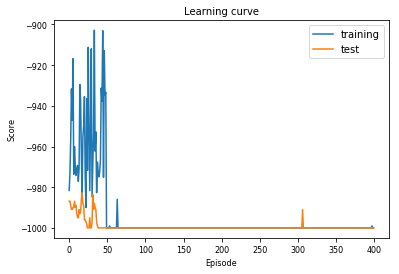

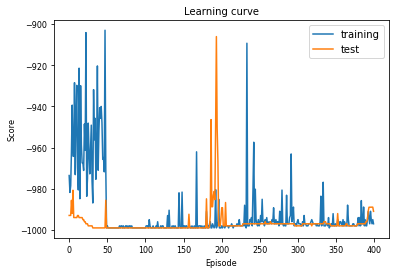

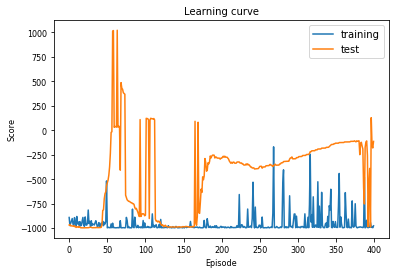

In [3]:
from matplotlib import pyplot as plt
trial_history = json.loads(dict(learning_trials.trial_attachments(trial))['history'])
for i in range(3):
    training_scores = [np.sum(ep['rewards']) for ep in trial_history[i]['training_episodes']]
    test_scores = [np.sum(ep['rewards']) for ep in trial_history[i]['test_episodes']]
    plot_scores(training_scores, test_scores)
    plt.show()

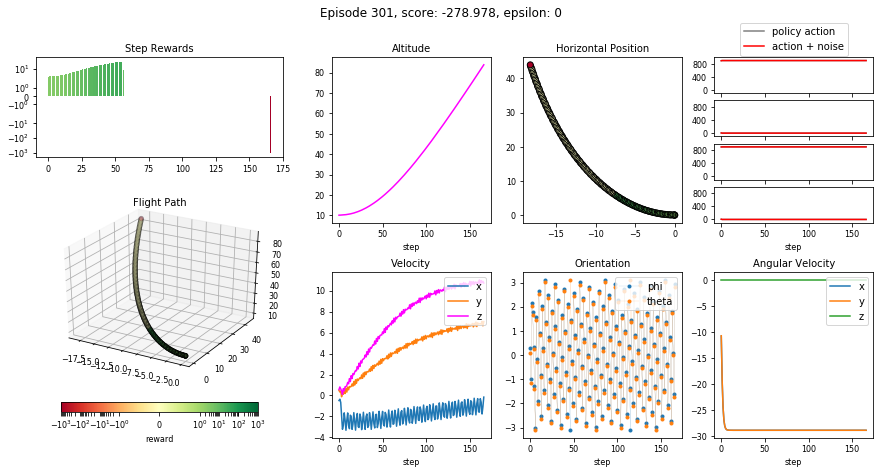

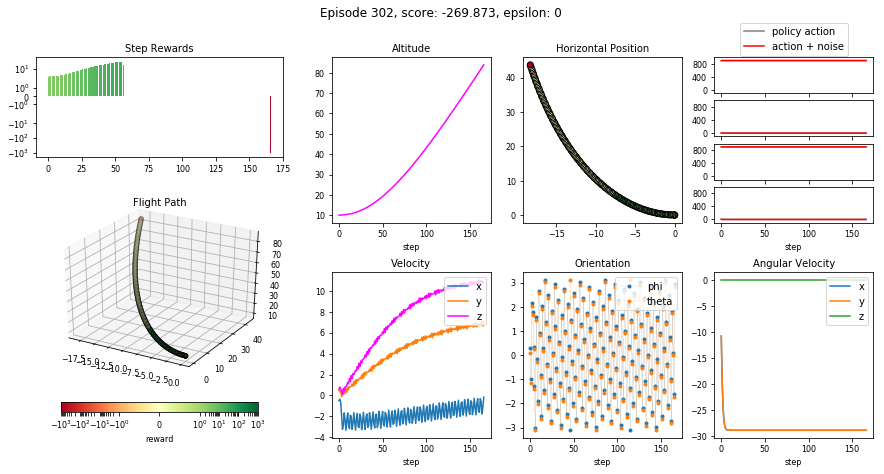

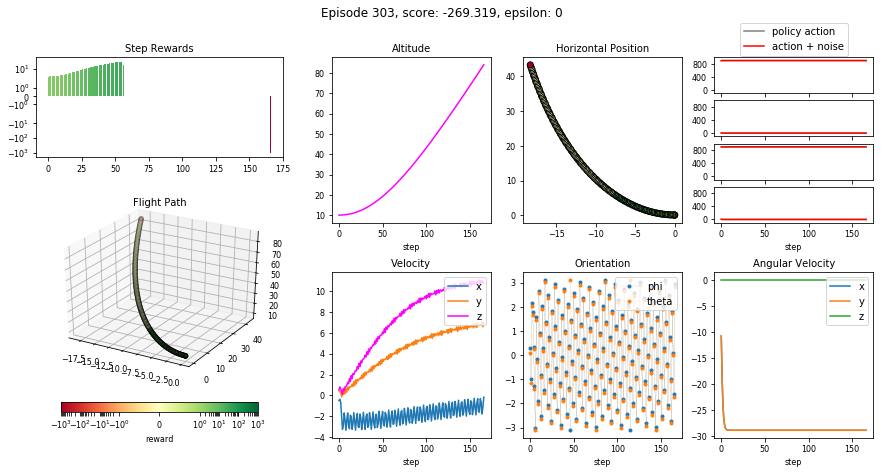

In [4]:
trial_history = json.loads(dict(learning_trials.trial_attachments(trial))['history'])
for i in [300,301,302]:
    eh = EpisodeHistory._fromDict(trial_history[2]['test_episodes'][i])
    plot_quadcopter_episode(eh)

In [5]:
jobs = MongoJobs.new_from_connection_str("mongo://localhost:27017/hyperopt/jobs",)

In [6]:
# Delete stale jobs
for j in jobs.jobs_running():
    # if over 3 hrs old
    if (datetime.now()-j['refresh_time']).seconds/3600>3:
        jobs.delete(j)

In [7]:
from datetime import datetime
[(j['refresh_time'].isoformat(),(datetime.now()-j['refresh_time']).seconds/3600) for j in jobs.jobs_running()]

[]